In [1]:
import fastbook
import fastcore

from fastbook import *
from fastai.vision import *
from fastai.vision.all import *
from fastai.metrics import error_rate

def get_sample_pascal2007():
    sysPath = sys.path
    datasetPath = sysPath[0] + '/pascal_2007'
#     Path.BASE_PATH=datasetPath
    return Path(datasetPath)

pascalPath = get_sample_pascal2007()

pascalPath.ls()

(#8) [Path('/media/jimbeam/DATA/Project/unpackAI/assignment/Pascal/pascal_2007/segmentation'),Path('/media/jimbeam/DATA/Project/unpackAI/assignment/Pascal/pascal_2007/test'),Path('/media/jimbeam/DATA/Project/unpackAI/assignment/Pascal/pascal_2007/test.csv'),Path('/media/jimbeam/DATA/Project/unpackAI/assignment/Pascal/pascal_2007/test.json'),Path('/media/jimbeam/DATA/Project/unpackAI/assignment/Pascal/pascal_2007/train'),Path('/media/jimbeam/DATA/Project/unpackAI/assignment/Pascal/pascal_2007/train.csv'),Path('/media/jimbeam/DATA/Project/unpackAI/assignment/Pascal/pascal_2007/train.json'),Path('/media/jimbeam/DATA/Project/unpackAI/assignment/Pascal/pascal_2007/valid.json')]

In [2]:
df = pd.read_csv(pascalPath/'train.csv')
df.head()

,fname,labels,is_valid
0,000005.jpg,chair,True
1,000007.jpg,car,True
2,000009.jpg,horse person,True
3,000012.jpg,car,False
4,000016.jpg,bicycle,True


In [3]:
dBlock = DataBlock()
dSets = dBlock.datasets(df)
dSets.train[0]

(fname       008663.jpg
 labels      car person
 is_valid         False
 Name: 4346, dtype: object,
 fname       008663.jpg
 labels      car person
 is_valid         False
 Name: 4346, dtype: object)

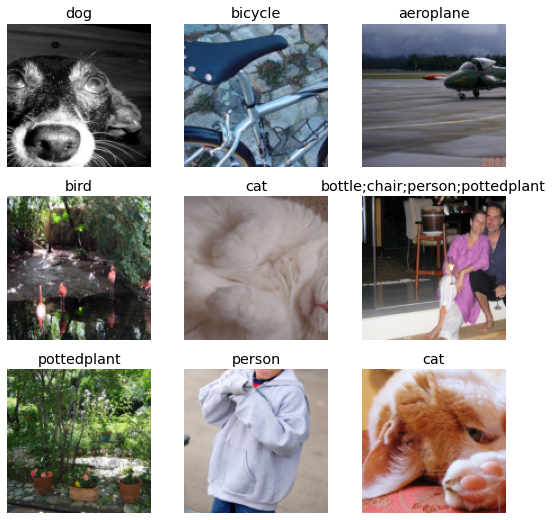

In [4]:
def getX(r): return pascalPath/'train'/r['fname']

def getY(r): return r['labels'].split(' ')

def splitterDataset(df):
    train = df.index[~df['is_valid']].tolist()
    valid = df.index[df['is_valid']].tolist()
    return train, valid

dBlock = DataBlock(
    blocks=(ImageBlock, MultiCategoryBlock), 
    splitter=splitterDataset,
    get_x = getX, 
    get_y = getY,
    item_tfms = RandomResizedCrop(128, min_scale=0.35))

# dSets = dBlock.datasets(df)
# dSets.train[0]

dls = dBlock.dataloaders(df)
dls.show_batch(nrows=3, ncols=3)

In [5]:
learn = cnn_learner(
    dls, 
    resnet50, 
    metrics=partial(accuracy_multi, thresh=0.9))

# learn.fine_tune(3, base_lr=3e-3, freeze_epochs=4)

# 1st Run

SuggestedLRs(lr_min=0.02089296132326126, lr_steep=0.03981071710586548)

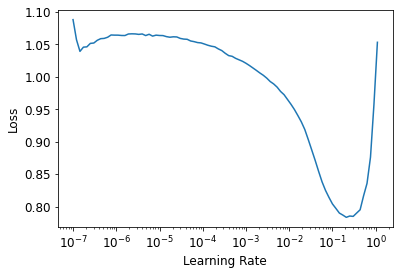

In [6]:
learn.lr_find()

In [11]:
lr = 1e-2

In [7]:
learn.fit_one_cycle(5, slice(lr))

epoch,train_loss,valid_loss,accuracy_multi,time
0,0.718973,0.218315,0.951753,00:19
1,0.330437,0.118990,0.952211,00:18
2,0.207200,0.110290,0.953665,00:19
3,0.149961,0.106832,0.954064,00:19
4,0.119513,0.105558,0.954562,00:19


In [8]:
learn.save('rn50-1st')

Path('models/rn50-1st.pth')

# 2nd Run

In [9]:
learn.unfreeze()

SuggestedLRs(lr_min=8.317637839354575e-05, lr_steep=1.3182567499825382e-06)

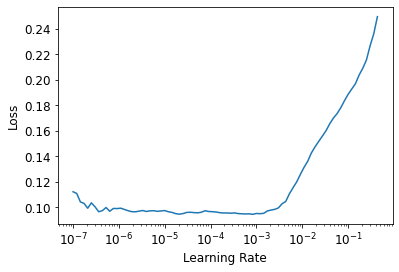

In [10]:
learn.lr_find()

In [12]:
learn.fit_one_cycle(5, slice(1e-6, lr/5))

epoch,train_loss,valid_loss,accuracy_multi,time
0,0.097111,0.103632,0.956195,00:22
1,0.094567,0.106806,0.958845,00:22
2,0.086274,0.102827,0.958327,00:22
3,0.075501,0.102406,0.958426,00:22
4,0.067607,0.102056,0.958924,00:22


In [13]:
learn.save('rn50-2nd')

Path('models/rn50-2nd.pth')

# 3rd Run

In [14]:
dBlock = DataBlock(
    blocks=(ImageBlock, MultiCategoryBlock), 
    splitter=splitterDataset,
    get_x = getX, 
    get_y = getY,
    item_tfms = RandomResizedCrop(128, min_scale=0.35),
    batch_tfms = Normalize()
)

dls = dBlock.dataloaders(df)
learn.data = dls

In [15]:
learn.freeze()

SuggestedLRs(lr_min=0.00014454397605732084, lr_steep=1.3182567499825382e-06)

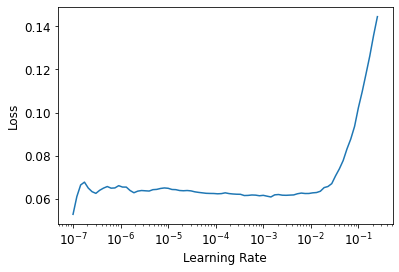

In [16]:
learn.lr_find()

In [17]:
new_lr = 1e-2 * 0.5

In [18]:
learn.fit_one_cycle(5, slice(new_lr))

epoch,train_loss,valid_loss,accuracy_multi,time
0,0.064510,0.110428,0.960936,00:19
1,0.074830,0.118658,0.960777,00:19
2,0.070281,0.114769,0.961434,00:19
3,0.065145,0.113110,0.961235,00:19
4,0.058600,0.112540,0.961255,00:19


In [19]:
learn.save('rn50-3rd')

Path('models/rn50-3rd.pth')

# 4th Run

In [20]:
learn.unfreeze()

In [21]:
learn.fit_one_cycle(5, slice(1e-6, new_lr/5))

epoch,train_loss,valid_loss,accuracy_multi,time
0,0.053803,0.112310,0.960936,00:22
1,0.053877,0.115737,0.961235,00:22
2,0.050416,0.117125,0.961534,00:22
3,0.047180,0.115908,0.962171,00:22
4,0.043313,0.116254,0.962291,00:22


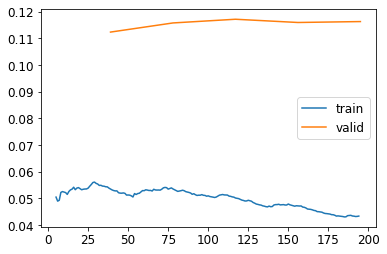

In [23]:
learn.recorder.plot_loss()

In [24]:
learn.save('rn50-4th')

Path('models/rn50-4th.pth')

In [25]:
learn.export()

In [ ]:
# Test

In [ ]:
learn.predict('')